# 📊 Proyecto Data Science: Análisis de Tendencias de Inversión

## Importación de librerias

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
datos = "https://raw.githubusercontent.com/Sts87/data-analysis/refs/heads/master/00-finance-trends/Finance_Trends.csv"
df = pd.read_csv(datos)

In [21]:
df.head(5)

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Male,29,Yes,2,4,7,5,3,1,6,...,Less than 1 year,Weekly,20%-30%,Public Provident Fund,Health Care,Dividend,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines
1,Male,28,Yes,2,3,6,5,1,4,7,...,Less than 1 year,Weekly,30%-40%,Public Provident Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Television
2,Female,28,Yes,2,3,7,5,4,1,6,...,3-5 years,Daily,10%-20%,Mutual Fund,Health Care,Dividend,Better Returns,Assured Returns,Risk Free,Financial Consultants
3,Male,19,Yes,2,3,7,4,6,1,5,...,More than 5 years,Monthly,10%-20%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines
4,Male,32,Yes,2,4,7,5,3,1,6,...,More than 5 years,Weekly,10%-20%,Public Provident Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants


In [22]:
df.shape

(12000, 24)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             12000 non-null  object
 1   age                                12000 non-null  int64 
 2   Investment_Avenues                 12000 non-null  object
 3   Mutual_Funds                       12000 non-null  int64 
 4   Equity_Market                      12000 non-null  int64 
 5   Debentures                         12000 non-null  int64 
 6   Government_Bonds                   12000 non-null  int64 
 7   Fixed_Deposits                     12000 non-null  int64 
 8   PPF                                12000 non-null  int64 
 9   Gold                               12000 non-null  int64 
 10  Stock_Marktet                      12000 non-null  object
 11  Factor                             12000 non-null  object
 12  Obje

## Diccionario de variables

**Tabla general de Tendencia de inversión**

| Variable                  | Descripción                                                                 | Tipo de dato | Ejemplo                 |
|---------------------------|-----------------------------------------------------------------------------|--------------|--------------------------|
| gender                    | Género de la persona encuestada                                             | object       | Male                     |
| age                       | Edad de la persona encuestada                                               | int64        | 29                       |
| Investment_Avenues        | Indica si la persona invierte en diferentes avenidas                        | object       | Yes                      |
| Mutual_Funds              | Preferencia o nivel de inversión en fondos mutuos                           | int64        | 2                        |
| Equity_Market             | Preferencia o nivel de inversión en mercado de acciones                     | int64        | 4                        |
| Debentures                | Preferencia o nivel de inversión en debentures                              | int64        | 7                        |
| Government_Bonds          | Preferencia o nivel de inversión en bonos gubernamentales                   | int64        | 5                        |
| Fixed_Deposits            | Preferencia o nivel de inversión en depósitos fijos                         | int64        | 3                        |
| PPF                       | Preferencia o nivel de inversión en Public Provident Fund                   | int64        | 1                        |
| Gold                      | Preferencia o nivel de inversión en oro                                     | int64        | 6                        |
| Stock_Marktet             | Indica si invierte en el mercado de acciones (variable redundante)          | object       | Yes                      |
| Factor                    | Factor principal que influye en la inversión                                | object       | Risk                     |
| Objective                 | Objetivo financiero principal                                               | object       | Growth                   |
| Purpose                   | Propósito de ahorro/inversión                                               | object       | Wealth Creation          |
| Duration                  | Horizonte temporal de la inversión                                          | object       | Less than 1 year         |
| Invest_Monitor            | Frecuencia de monitoreo de inversiones                                      | object       | Weekly                   |
| Expect                    | Expectativa de retorno expresada en porcentaje                              | object       | 20%-30%                  |
| Avenue                    | Instrumento de inversión preferido                                          | object       | Public Provident Fund    |
| What are your savings objectives? | Objetivo específico de ahorro declarado por el encuestado           | object       | Health Care              |
| Reason_Equity             | Razón para invertir en acciones                                             | object       | Dividend                 |
| Reason_Mutual             | Razón para invertir en fondos mutuos                                        | object       | Fund Diversification     |
| Reason_Bonds              | Razón para invertir en bonos                                                | object       | Assured Returns          |
| Reason_FD                 | Razón para invertir en depósitos fijos                                      | object       | Fixed Returns            |
| Source                    | Fuente de información sobre inversiones                                     | object       | Newspapers and Magazines |


In [24]:
for col in df.select_dtypes('object'):
    print(f"{col}: {df[col].unique()[:5]}")

gender: ['Male' 'Female']
Investment_Avenues: ['Yes' 'No']
Stock_Marktet: ['Yes' 'No']
Factor: ['Risk' 'Returns' 'Locking Period']
Objective: ['Growth' 'Capital Appreciation' 'Income']
Purpose: ['Wealth Creation' 'Savings for Future' 'Returns']
Duration: ['Less than 1 year' '3-5 years' 'More than 5 years' '1-3 years']
Invest_Monitor: ['Weekly' 'Daily' 'Monthly']
Expect: ['20%-30%' '30%-40%' '10%-20%']
Avenue: ['Public Provident Fund' 'Mutual Fund' 'Equity' 'Fixed Deposits']
What are your savings objectives?: ['Health Care' 'Retirement Plan' 'Education']
Reason_Equity: ['Dividend' 'Capital Appreciation' 'Liquidity']
Reason_Mutual: ['Fund Diversification' 'Better Returns' 'Tax Benefits']
Reason_Bonds: ['Assured Returns' 'Safe Investment' 'Tax Incentives']
Reason_FD: ['Fixed Returns' 'Risk Free' 'High Interest Rates']
Source: ['Newspapers and Magazines' 'Television' 'Financial Consultants'
 'Internet']


In [25]:
df = df.apply(lambda col: col.str.strip() if col.dtype == "object" else col)
df.replace('', np.nan, inplace=True)
df.isnull().sum()

gender                               0
age                                  0
Investment_Avenues                   0
Mutual_Funds                         0
Equity_Market                        0
Debentures                           0
Government_Bonds                     0
Fixed_Deposits                       0
PPF                                  0
Gold                                 0
Stock_Marktet                        0
Factor                               0
Objective                            0
Purpose                              0
Duration                             0
Invest_Monitor                       0
Expect                               0
Avenue                               0
What are your savings objectives?    0
Reason_Equity                        0
Reason_Mutual                        0
Reason_Bonds                         0
Reason_FD                            0
Source                               0
dtype: int64

## Análisis Exploratorio de Datos

In [26]:
df.describe()

,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,27.779000,2.534583,3.459000,5.777750,4.670333,3.556333,2.023583,5.978417
std,4.056316,1.168511,1.112245,1.638824,1.330276,1.757200,1.592086,1.119697
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,25.000000,2.000000,3.000000,5.000000,4.000000,2.000000,1.000000,6.000000
50%,28.000000,2.000000,4.000000,7.000000,5.000000,3.000000,1.000000,6.000000
75%,31.000000,3.000000,4.000000,7.000000,5.000000,5.000000,3.000000,7.000000
max,38.000000,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000


age                    Axes(0.125,0.653529;0.227941x0.226471)
Mutual_Funds        Axes(0.398529,0.653529;0.227941x0.226471)
Equity_Market       Axes(0.672059,0.653529;0.227941x0.226471)
Debentures             Axes(0.125,0.381765;0.227941x0.226471)
Government_Bonds    Axes(0.398529,0.381765;0.227941x0.226471)
Fixed_Deposits      Axes(0.672059,0.381765;0.227941x0.226471)
PPF                        Axes(0.125,0.11;0.227941x0.226471)
Gold                    Axes(0.398529,0.11;0.227941x0.226471)
dtype: object

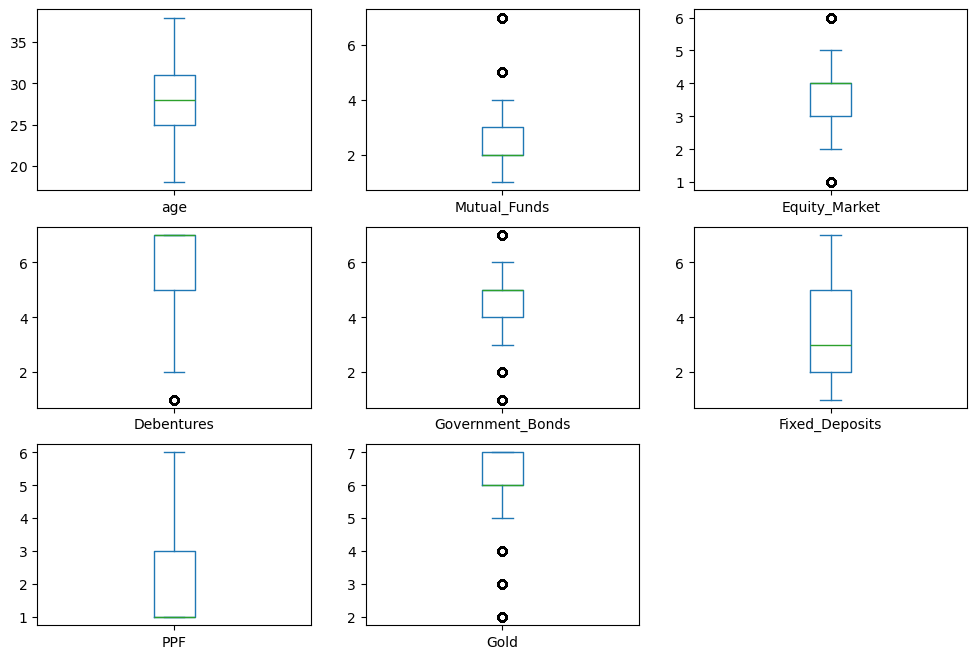

In [27]:
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(12,8))

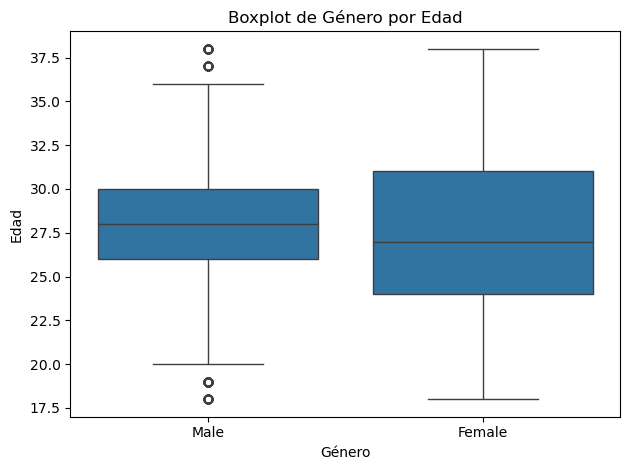

In [72]:
fig, ax = plt.subplots()
ax.set_title('Boxplot de Género por Edad')
sns.boxplot(data=df,x='gender', y='age')
ax.set_ylabel('Edad')
ax.set_xlabel('Género')
plt.tight_layout()
plt.show()

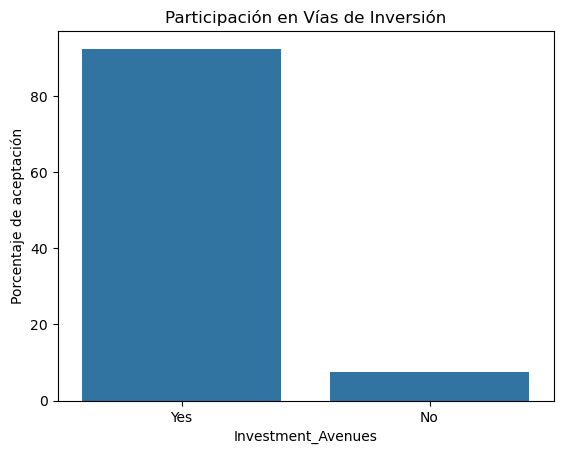

In [147]:
fig, ax = plt.subplots()
ax.set_title('Participación en Vías de Inversión')
sns.countplot(data=df, x='Investment_Avenues', stat='percent')
ax.set_ylabel('Porcentaje de aceptación')
plt.show()

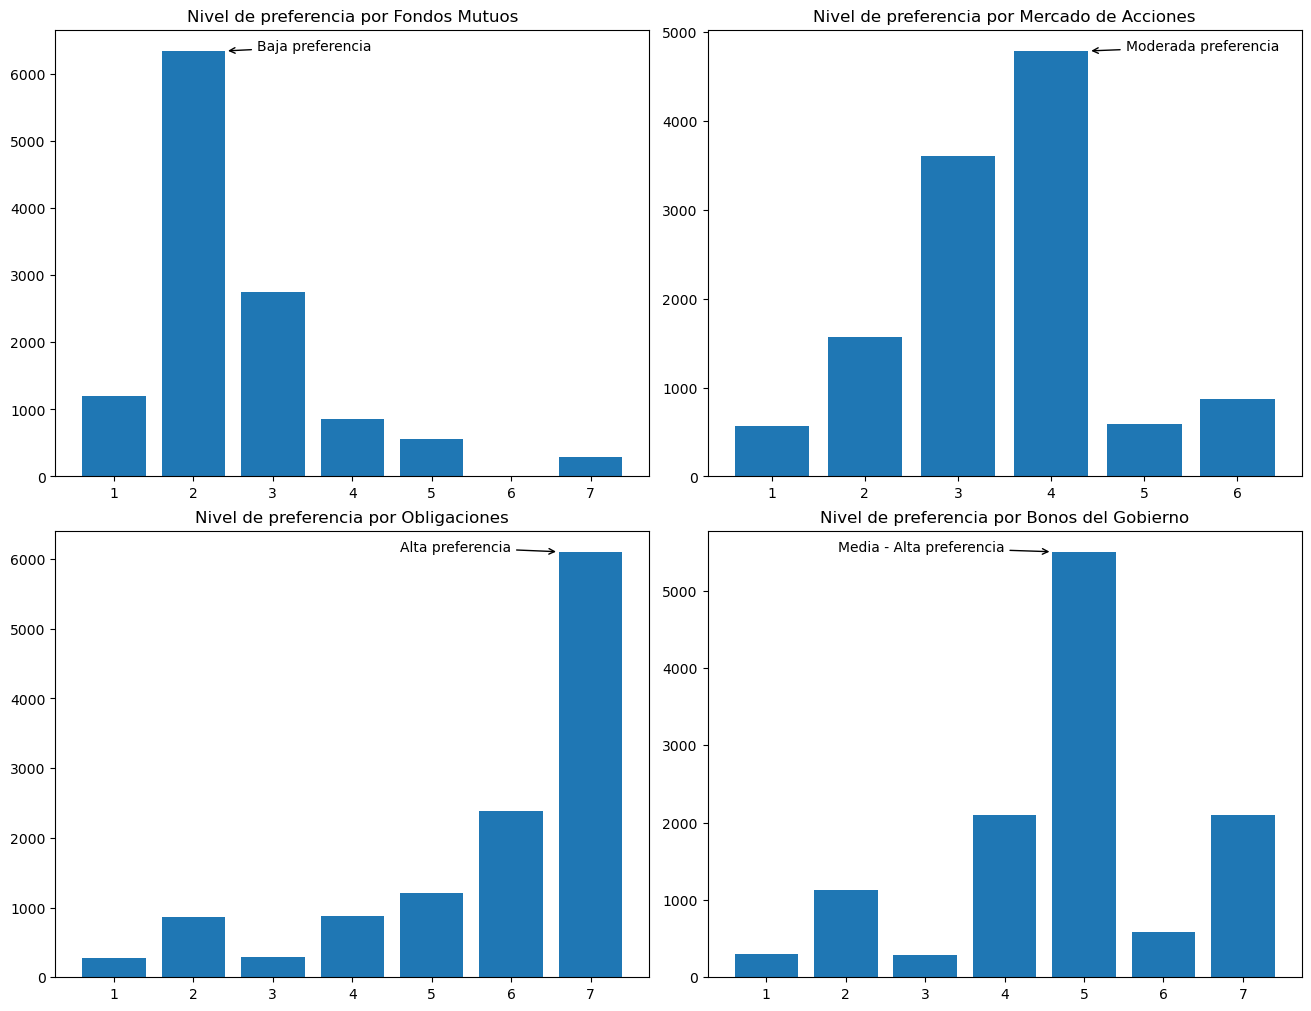

In [302]:
fig, axs = plt.subplots(2,2, figsize=(13,10), constrained_layout=True)
axs[0,0].set_title('Nivel de preferencia por Fondos Mutuos')
axs[0,0].bar(df.Mutual_Funds.unique(), df.Mutual_Funds.value_counts())
axs[0,0].annotate('Baja preferencia', xy=(2.4, df.Mutual_Funds.value_counts().max()), xytext=(2.8, df.Mutual_Funds.value_counts().max()+5), 
                  arrowprops=dict(facecolor='black', arrowstyle='->'))

axs[0,1].set_title('Nivel de preferencia por Mercado de Acciones')
axs[0,1].bar(df.Equity_Market.unique(), df.Equity_Market.value_counts())
axs[0,1].annotate('Moderada preferencia', xy=(4.4, df.Equity_Market.value_counts().max()), xytext=(4.8, df.Equity_Market.value_counts().max()+5), 
                  arrowprops=dict(facecolor='black', arrowstyle='->'))

axs[1,0].set_title('Nivel de preferencia por Obligaciones')
axs[1,0].bar(df.Debentures.unique(), df.Debentures.value_counts())
axs[1,0].annotate('Alta preferencia', xy=(6.6, df.Debentures.value_counts().max()), xytext=(4.6, df.Debentures.value_counts().max()+5), 
                  arrowprops=dict(facecolor='black', arrowstyle='->'))

axs[1,1].set_title('Nivel de preferencia por Bonos del Gobierno')
axs[1,1].bar(df.Government_Bonds.unique(), df.Government_Bonds.value_counts())
axs[1,1].annotate('Media - Alta preferencia', xy=(4.6, df.Government_Bonds.value_counts().max()), xytext=(1.9, df.Government_Bonds.value_counts().max()+5), 
                  arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

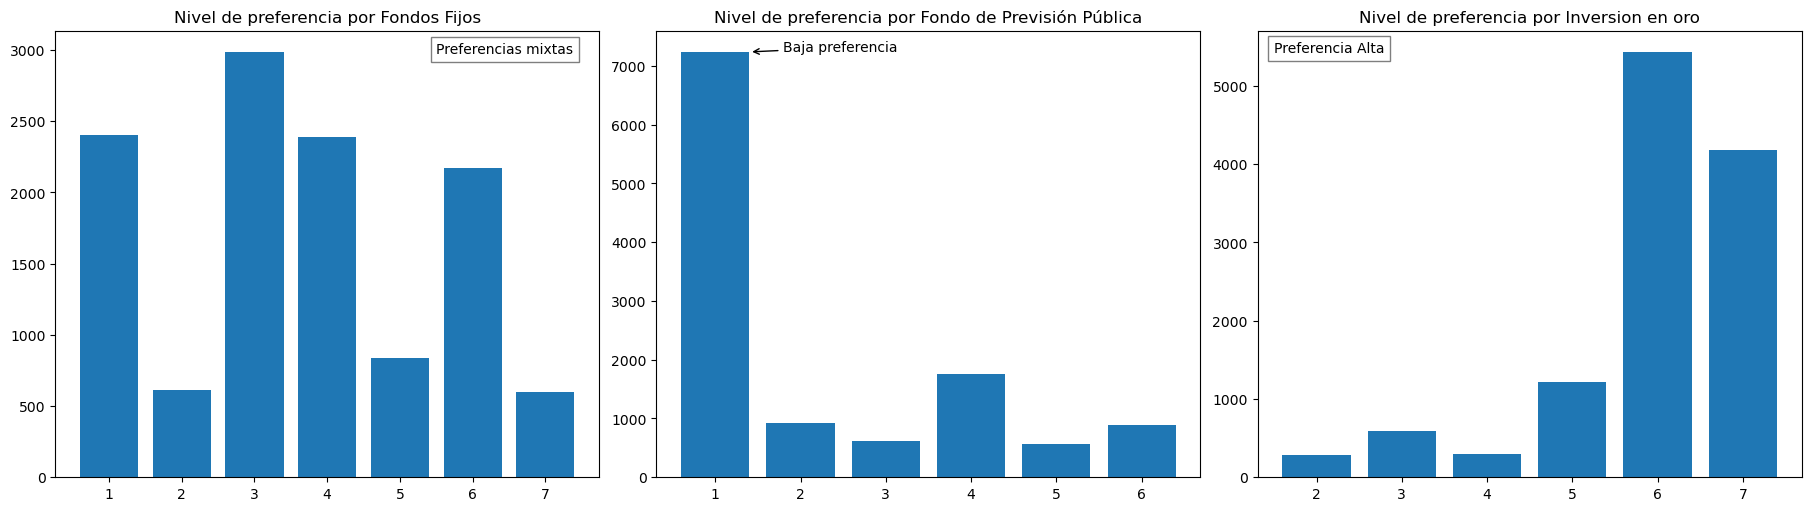

In [332]:
fig, axs = plt.subplots(1,3, figsize=(18,5), constrained_layout=True)

axs[0].set_title('Nivel de preferencia por Fondos Fijos')
axs[0].bar(df.Fixed_Deposits.unique(), df.Fixed_Deposits.value_counts())
axs[0].text(5.5, df.Fixed_Deposits.value_counts().max()-10, 'Preferencias mixtas', bbox=dict(facecolor='white',alpha=0.5, boxstyle='square,pad=0.4'))

axs[1].set_title('Nivel de preferencia por Fondo de Previsión Pública')
axs[1].bar(df.PPF.unique(), df.PPF.value_counts())
axs[1].annotate('Baja preferencia', xy=(1.4, df.PPF.value_counts().max()), xytext=(1.8, df.PPF.value_counts().max()+5),
                arrowprops=dict(facecolor='black', arrowstyle='->'))

axs[2].set_title('Nivel de preferencia por Inversion en oro')
axs[2].bar(df.Gold.unique(), df.Gold.value_counts())
axs[2].text(1.5, df.Gold.value_counts().max()-10, 'Preferencia Alta', bbox=dict(facecolor='white',alpha=0.5, boxstyle='square,pad=0.4'))

plt.show()

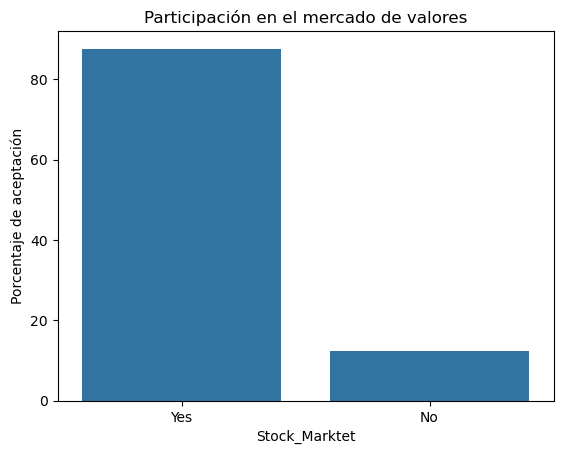

In [230]:
fig, ax = plt.subplots()
ax.set_title('Participación en el mercado de valores')
sns.countplot(data=df, x='Stock_Marktet', stat='percent')
ax.set_ylabel('Porcentaje de aceptación')
plt.show()